In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv2.imread("Eagle_in_Flight.jpg")

In [5]:
img_float = img.astype(np.float32)

matrix1 = img_float * 1.1  # Increase contrast by 10%
matrix2 = img_float * 1.2  # Increase contrast by 20%

img_higher1 = np.clip(matrix1, 0, 255).astype(np.uint8)
img_higher2 = np.clip(matrix2, 0, 255).astype(np.uint8)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_higher1_rgb = cv2.cvtColor(img_higher1, cv2.COLOR_BGR2RGB)
img_higher2_rgb = cv2.cvtColor(img_higher2, cv2.COLOR_BGR2RGB)

In [6]:
cv2.imwrite("output.png",img_higher2_rgb)

True

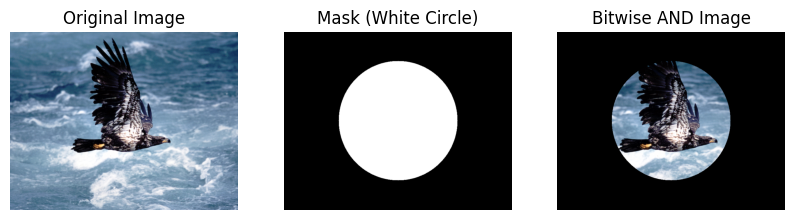

In [7]:
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Draw a white filled circle on the mask
center = (img.shape[1] // 2, img.shape[0] // 2)  # Center of the image
radius = min(img.shape[:2]) // 3  # Radius proportional to image size
cv2.circle(mask, center, radius, (255), thickness=-1)

# Apply Bitwise AND operation (Keeps only the area inside the circle)
bitwise_and_img = cv2.bitwise_and(img, img, mask=mask)

# Convert BGR to RGB for correct display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bitwise_and_rgb = cv2.cvtColor(bitwise_and_img, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask (White Circle)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(bitwise_and_rgb)
plt.title("Bitwise AND Image")
plt.axis("off")

plt.show()

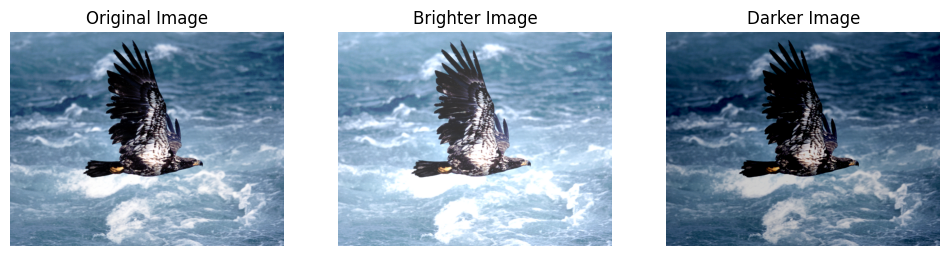

In [8]:
brightness_value = 50  # Adjust this value to increase/decrease brightness

# Create a matrix of ones with the same shape as the image
brightness_matrix = np.ones(img.shape, dtype="uint8") * brightness_value

# Increase brightness
img_brighter = cv2.add(img, brightness_matrix)

# Decrease brightness
img_darker = cv2.subtract(img, brightness_matrix)

# Convert modified images to RGB for correct Matplotlib display
img_brighter_rgb = cv2.cvtColor(img_brighter, cv2.COLOR_BGR2RGB)
img_darker_rgb = cv2.cvtColor(img_darker, cv2.COLOR_BGR2RGB)

# Display original, brighter, and darker images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_brighter_rgb)
plt.title("Brighter Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_darker_rgb)
plt.title("Darker Image")
plt.axis("off")

plt.show()

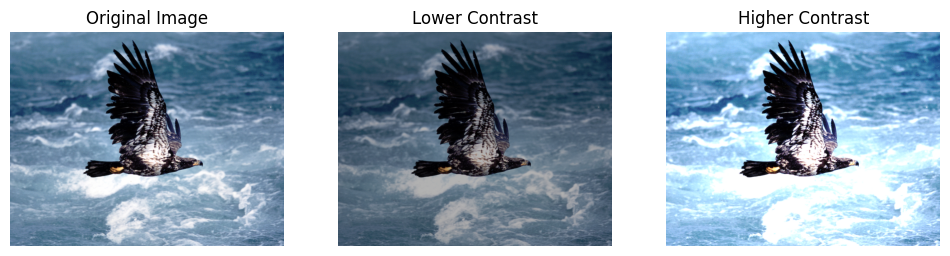

In [9]:
low_contrast = 0.7   # Reduce contrast
high_contrast = 1.5  # Increase contrast

# Apply contrast modifications
img_low_contrast = cv2.convertScaleAbs(img, alpha=low_contrast, beta=0)
img_high_contrast = cv2.convertScaleAbs(img, alpha=high_contrast, beta=0)

# Convert modified images to RGB
img_low_contrast_rgb = cv2.cvtColor(img_low_contrast, cv2.COLOR_BGR2RGB)
img_high_contrast_rgb = cv2.cvtColor(img_high_contrast, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_low_contrast_rgb)
plt.title("Lower Contrast")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_high_contrast_rgb)
plt.title("Higher Contrast")
plt.axis("off")

plt.show()